# one must install pygmt using the instructions linked below https://www.pygmt.org/v0.3.0/install.html#installing-gmt-and-other-dependencies

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pygmt
import os
import pandas as pd

# get the global MSS grids the first time only

In [2]:
#!wget -q --no-check-certificate https://topex.ucsd.edu/pub/MSS_replace/CNES_CLS_22_H_WGS84.nc
#!wget -q --no-check-certificate https://topex.ucsd.edu/pub/MSS_replace/mss_sio_32.1_WGS84.nc

# open the two mss grid and display an area

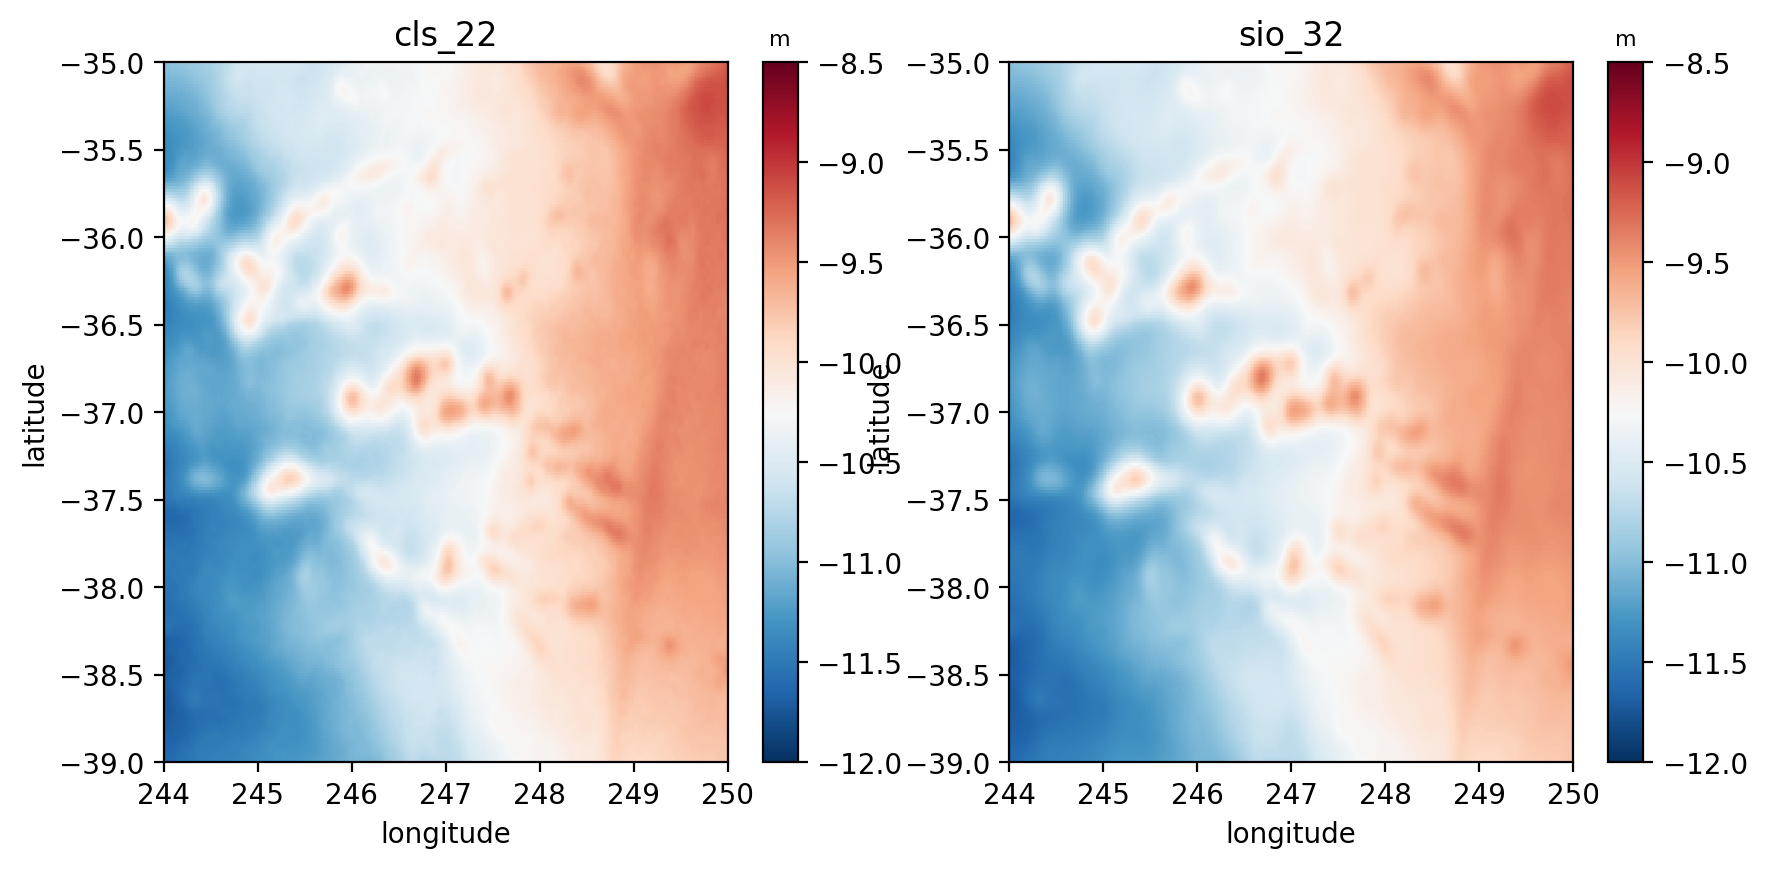

In [3]:
grid_file32 = xr.open_dataset("mss_sio_32.1_WGS84.nc")
cgrid32 = grid_file32.sel(lon=slice(244,250), lat=slice(-39,-35))
grid_file22 = xr.open_dataset("CNES_CLS_22_H_WGS84.nc")
cgrid22 = grid_file22.sel(lon=slice(244,250), lat=slice(-39,-35))
plt.figure(figsize=(10, 10), dpi=200)
plt.subplot(222); plt.pcolormesh(cgrid32.lon, cgrid32.lat, cgrid32.z, cmap='RdBu_r', shading='auto', vmin = -12, vmax = -8.5)
plt.xlim([244,250]); plt.ylim([-39,-35]); plt.title('sio_32'); plt.xlabel('longitude'); plt.ylabel('latitude')
clb = plt.colorbar(); clb.ax.set_title('m',fontsize=8); 
plt.subplot(221); plt.pcolormesh(cgrid22.lon, cgrid22.lat, cgrid22.z, cmap='RdBu_r', shading='auto', vmin = -12, vmax = -8.5)
plt.xlim([244,250]); plt.ylim([-39,-35]); plt.title('cls_22'); plt.xlabel('longitude'); plt.ylabel('latitude')
clb = plt.colorbar(); clb.ax.set_title('m',fontsize=8); 
plt.show()

# read a netcdf file of L2 expert

In [4]:
ds_Foundation = xr.open_dataset("SWOT_L2_LR_SSH_Expert_547_011_20230609T190904_20230609T200011_PIB0_01.nc") 
num_lines = ds_Foundation.sizes['num_lines']
num_pixels = ds_Foundation.sizes['num_pixels']
num_lines

9866

# extract the sio_32 MSS at the locations of the SWOT data using grdtrack

In [5]:
grid32 = "mss_sio_32.1_WGS84.nc"
data32 = {'longitude': ds_Foundation["longitude"].values.flatten(),
        'latitude': ds_Foundation["latitude"].values.flatten()}
track_points = pd.DataFrame(data32)
# Use grdtrack to sample the grid along the track
track_data32 = pygmt.grdtrack(points=track_points, grid=grid32,newcolname="sio32")

# extract the cls_22 MSS at the locations of the SWOT data using grdtrack

In [6]:
grid22 = "CNES_CLS_22_H_WGS84.nc"
data22 = {'longitude': ds_Foundation["longitude"].values.flatten(),
        'latitude': ds_Foundation["latitude"].values.flatten()}
track_points = pd.DataFrame(data22)
# Use grdtrack to sample the grid along the track
track_data22 = pygmt.grdtrack(points=track_points, grid=grid22,newcolname="cls22")


# take the three-way differences of the models

In [7]:
cls22_mss_hy = track_data22.cls22.to_numpy().reshape(num_lines, num_pixels) - ds_Foundation.mean_sea_surface_cnescls
sio32_mss_hy = track_data32.sio32.to_numpy().reshape(num_lines, num_pixels) - ds_Foundation.mean_sea_surface_cnescls
cls22_sio32 = track_data22.cls22.to_numpy().reshape(num_lines, num_pixels) - track_data32.sio32.to_numpy().reshape(num_lines, num_pixels) 

# plot the three models and their differences

/var/folders/s1/2g7wjdhn58v1v_07s05z64280006y5/T/ipykernel_38199/1177260575.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(track_data22.longitude.to_numpy().reshape(num_lines, num_pixels), track_data22.latitude.to_numpy().reshape(num_lines, num_pixels), track_data22.cls22.to_numpy().reshape(num_lines, num_pixels), cmap='RdBu_r', vmin=-12, vmax=-9,  shading='auto')
/var/folders/s1/2g7wjdhn58v1v_07s05z64280006y5/T/ipykernel_38199/1177260575.py:9: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(track_data32.longitude.to_numpy().reshape(num_lines, num_p

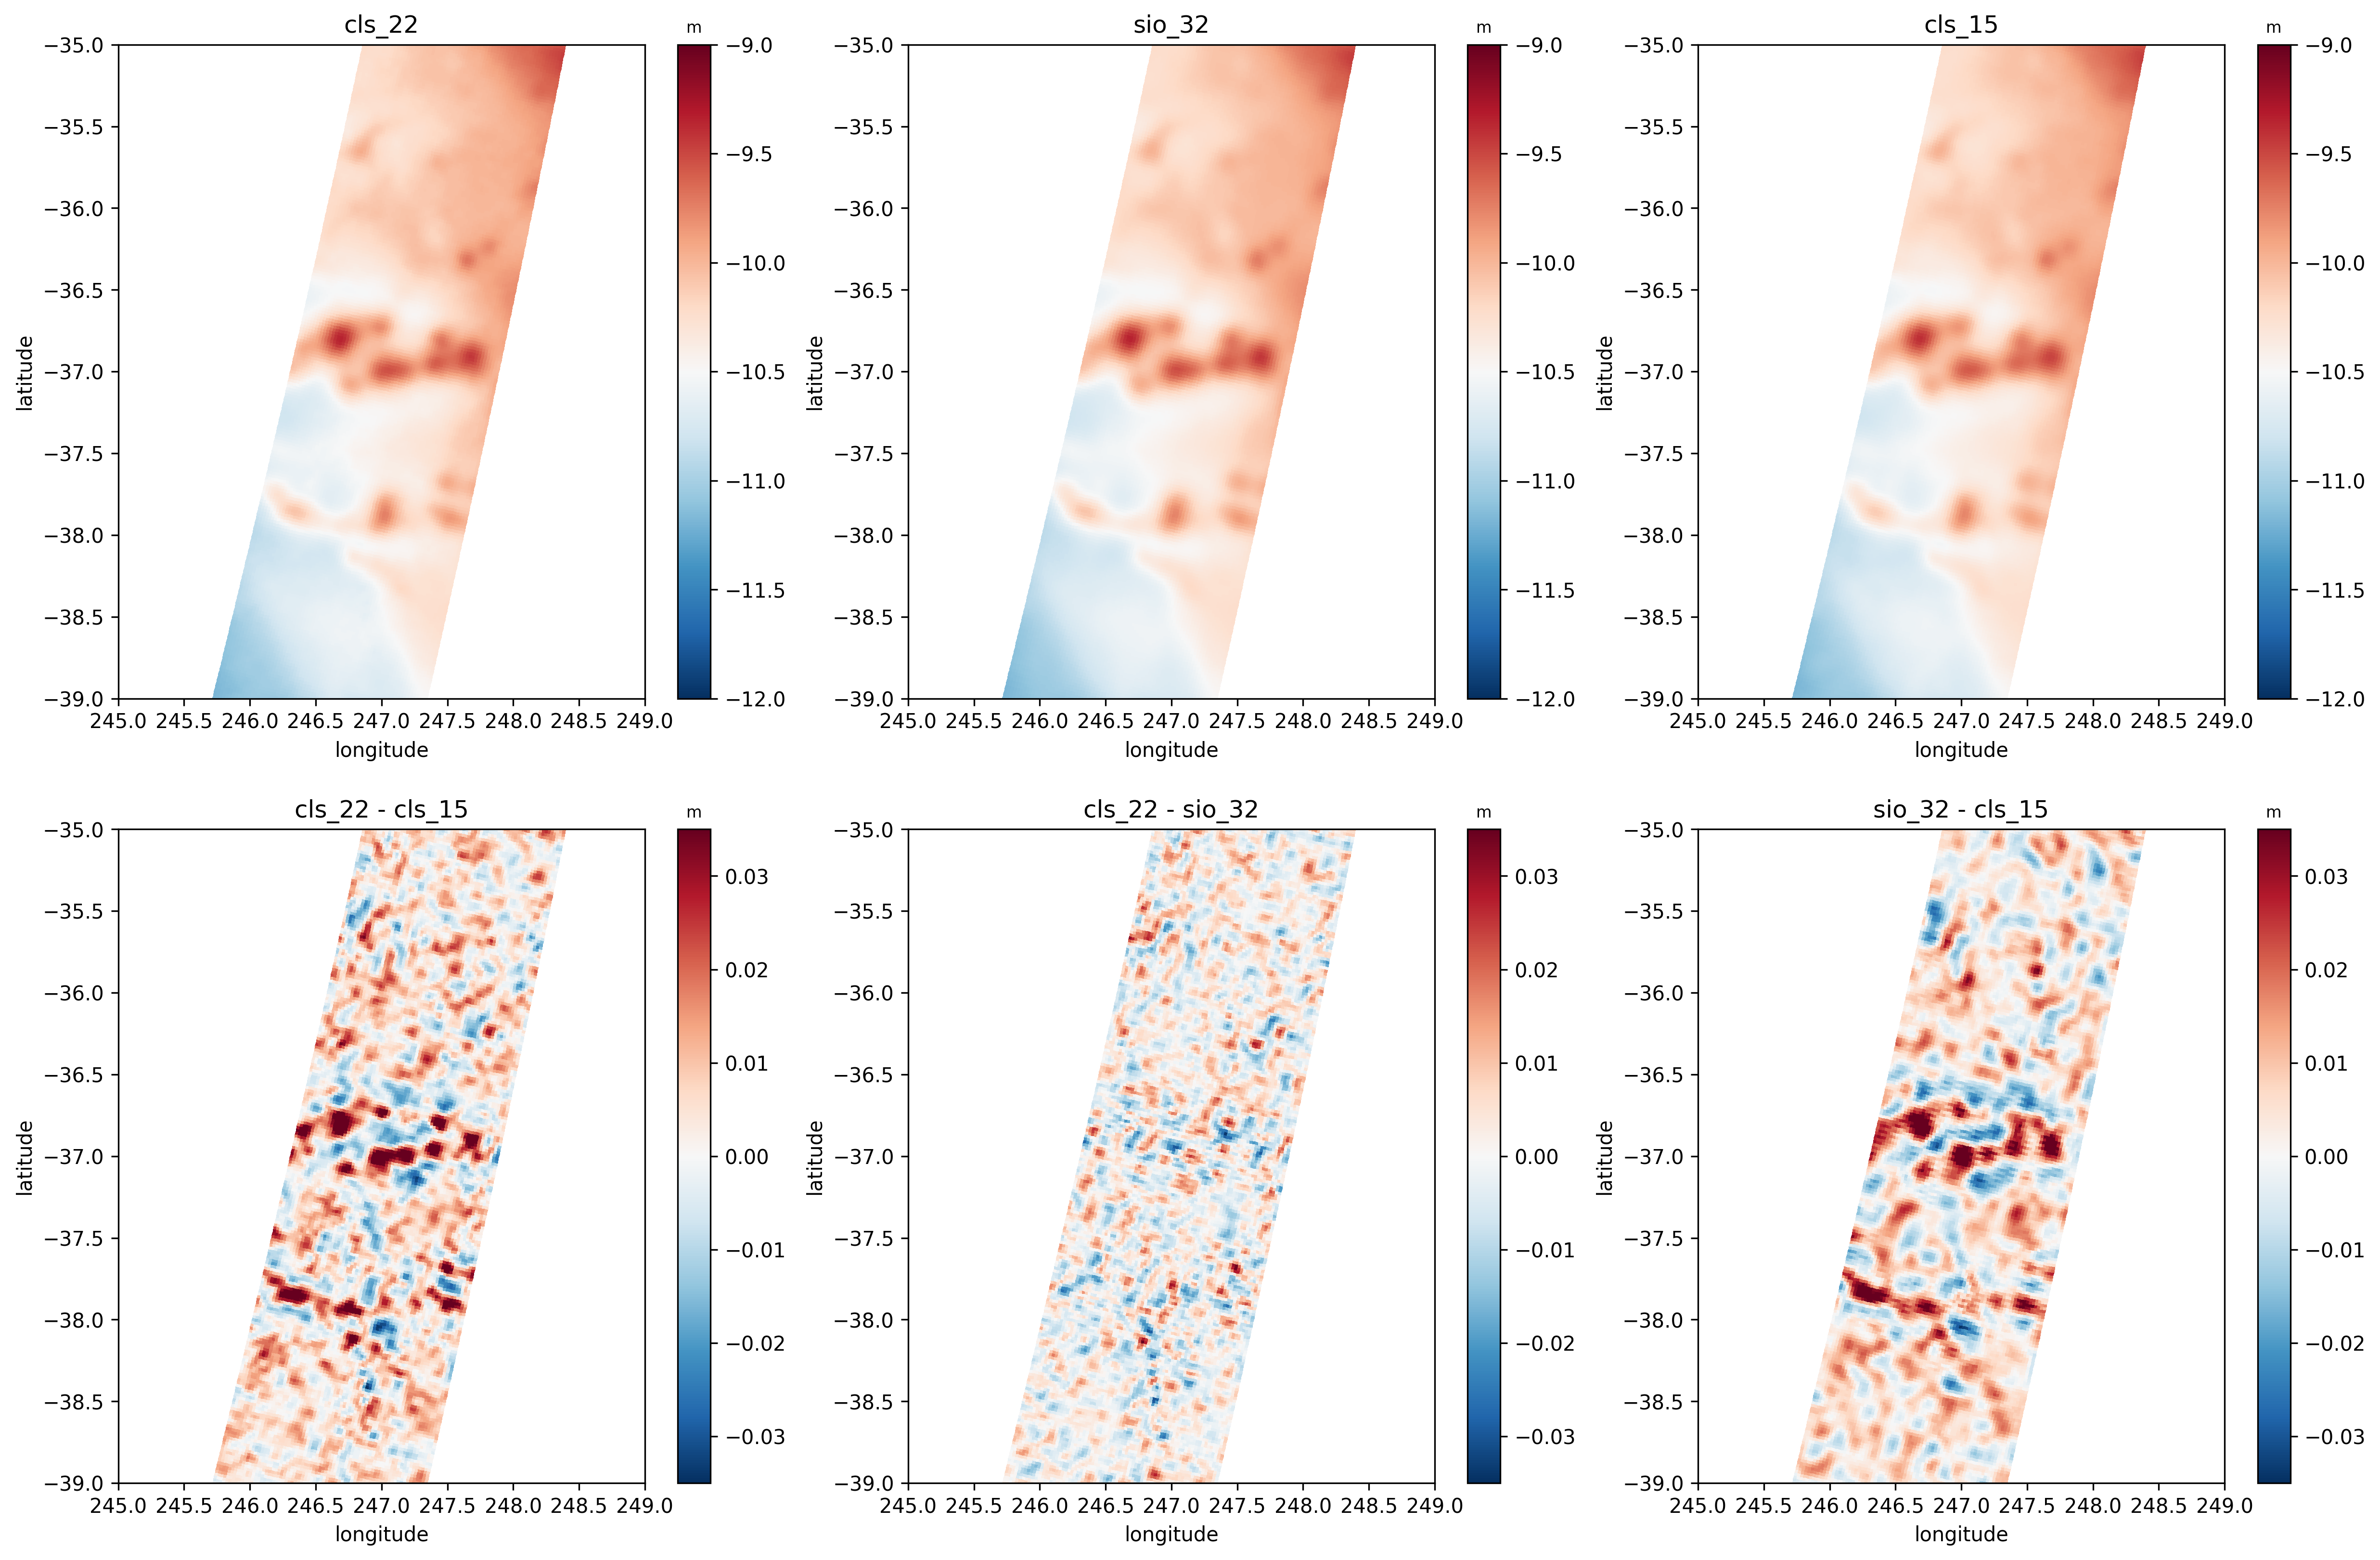

In [8]:
plt.figure(figsize=(20,20), dpi=300)

plt.subplot(331)
plt.pcolormesh(track_data22.longitude.to_numpy().reshape(num_lines, num_pixels), track_data22.latitude.to_numpy().reshape(num_lines, num_pixels), track_data22.cls22.to_numpy().reshape(num_lines, num_pixels), cmap='RdBu_r', vmin=-12, vmax=-9,  shading='auto')
plt.xlim([245,249]); plt.ylim([-39,-35]); plt.xlabel('longitude'); plt.ylabel('latitude'); clb = plt.colorbar(); clb.ax.set_title('m',fontsize=8)
plt.title('cls_22')

plt.subplot(332)
plt.pcolormesh(track_data32.longitude.to_numpy().reshape(num_lines, num_pixels), track_data32.latitude.to_numpy().reshape(num_lines, num_pixels), track_data32.sio32.to_numpy().reshape(num_lines, num_pixels), cmap='RdBu_r', vmin=-12, vmax=-9., shading='auto')
plt.xlim([245,249]); plt.ylim([-39,-35]); plt.xlabel('longitude'); plt.ylabel('latitude'); clb = plt.colorbar(); clb.ax.set_title('m',fontsize=8)
plt.title('sio_32')

plt.subplot(333)
plt.pcolormesh(ds_Foundation.longitude, ds_Foundation.latitude, ds_Foundation.mean_sea_surface_cnescls, cmap='RdBu_r', vmin=-12, vmax=-9, shading='auto')
plt.xlim([245,249]); plt.ylim([-39,-35]); plt.xlabel('longitude'); plt.ylabel('latitude'); clb = plt.colorbar(); clb.ax.set_title('m',fontsize=8)
plt.title('cls_15')

plt.subplot(334)
plt.pcolormesh(ds_Foundation.longitude, ds_Foundation.latitude, cls22_mss_hy, cmap='RdBu_r', shading='auto',vmin = -.035, vmax = .035)
plt.xlim([245,249]); plt.ylim([-39,-35]); plt.xlabel('longitude'); plt.ylabel('latitude'); clb = plt.colorbar(); clb.ax.set_title('m',fontsize=8)
plt.title('cls_22 - cls_15')

plt.subplot(335)
plt.pcolormesh(ds_Foundation.longitude, ds_Foundation.latitude, cls22_sio32, cmap='RdBu_r', shading='auto',vmin = -.035, vmax = .035)
plt.xlim([245,249]); plt.ylim([-39,-35]); plt.xlabel('longitude'); plt.ylabel('latitude'); clb = plt.colorbar(); clb.ax.set_title('m',fontsize=8)
plt.title('cls_22 - sio_32')

plt.subplot(336)
plt.pcolormesh(ds_Foundation.longitude, ds_Foundation.latitude, sio32_mss_hy, cmap='RdBu_r', shading='auto', vmin = -.035, vmax = .035)
plt.xlim([245,249]); plt.ylim([-39,-35]); plt.xlabel('longitude'); plt.ylabel('latitude'); clb = plt.colorbar(); clb.ax.set_title('m',fontsize=8)
plt.title('sio_32 - cls_15')


plt.show()